# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [20]:
import pandas as pd
        
df = pd.read_csv('../../../../Datasets/demo01.csv', sep = ',')
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0


Separe a base em treino e teste

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['mau'])  
y = df['mau']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

Inviavel visualizar a arvore com mais de 10 niveis de profundidade, leva muito tempo para rodar, apenas 10 levou 4 minutos e ainda sim ficou de extrema dificuldade a visualização.

Treinamento do modelo

In [22]:
from sklearn.tree import DecisionTreeClassifier
# árvore de decisão

clf = DecisionTreeClassifier(random_state=123, max_depth= 10, min_samples_leaf= 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=123)

Visualização da arvore

[Text(0.4609994229761329, 0.96875, 'MONTHS_BALANCE <= -33.5\ngini = 0.475\nsamples = 544400\nvalue = [332810, 211590]\nclass = mau'),
 Text(0.17594758531890017, 0.90625, 'MONTHS_BALANCE <= -45.5\ngini = 0.498\nsamples = 99582\nvalue = [46703, 52879]\nclass = bom'),
 Text(0.08108923963876793, 0.84375, 'MONTHS_BALANCE <= -51.5\ngini = 0.468\nsamples = 29272\nvalue = [10959, 18313]\nclass = bom'),
 Text(0.034926826318335755, 0.78125, 'NAME_EDUCATION_TYPE_Higher education <= 0.5\ngini = 0.443\nsamples = 10337\nvalue = [3419, 6918]\nclass = bom'),
 Text(0.01574040477342364, 0.71875, 'ID <= 5009120.5\ngini = 0.431\nsamples = 7551\nvalue = [2377, 5174]\nclass = bom'),
 Text(0.006680374133204322, 0.65625, 'DAYS_EMPLOYED <= -1635.0\ngini = 0.412\nsamples = 31\nvalue = [22, 9]\nclass = mau'),
 Text(0.006551362683438155, 0.59375, 'DAYS_EMPLOYED <= -5166.0\ngini = 0.153\nsamples = 24\nvalue = [22, 2]\nclass = mau'),
 Text(0.006422351233671989, 0.53125, 'MONTHS_BALANCE <= -56.0\ngini = 0.48\nsample

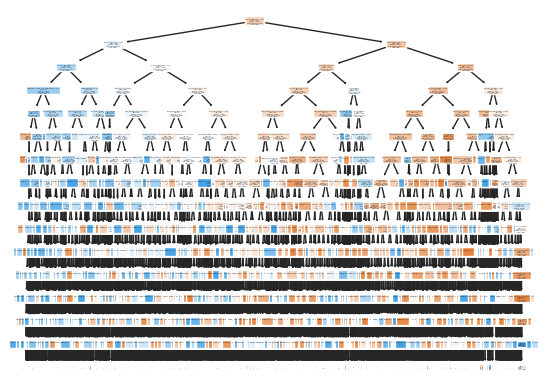

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = X.columns.tolist()

plot_tree(clf, filled=True, feature_names= X.columns.tolist(), class_names=['mau', 'bom'])


In [25]:
# árvore descontrolada
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

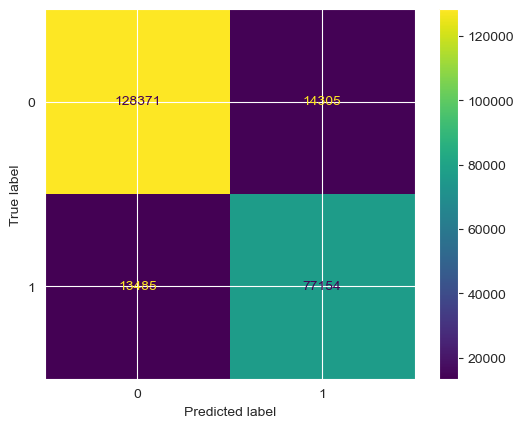

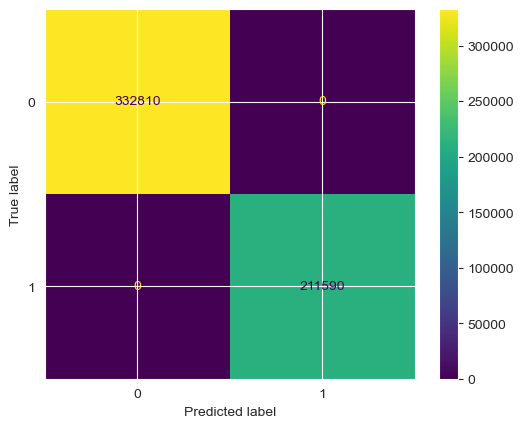

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# 1. classificação da base de teste
y_pred = clf.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


y_pred_train = clf.predict(X_train)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)




Prefiro classification report mais limpo de enchergar

In [34]:
clf = DecisionTreeClassifier(random_state=123, max_depth= 10, min_samples_leaf= 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [35]:
# classification report
from sklearn.metrics import classification_report

# matriz de confusão

y_pred_ajustado = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_ajustado))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    142676
           1       0.84      0.85      0.85     90639

    accuracy                           0.88    233315
   macro avg       0.87      0.88      0.87    233315
weighted avg       0.88      0.88      0.88    233315

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    332810
           1       1.00      1.00      1.00    211590

    accuracy                           1.00    544400
   macro avg       1.00      1.00      1.00    544400
weighted avg       1.00      1.00      1.00    544400

              precision    recall  f1-score   support

           0       0.64      0.91      0.75    142676
           1       0.59      0.21      0.31     90639

    accuracy                           0.64    233315
   macro avg       0.62      0.56      0.53    233315
weighted avg       0.62      0.64      0.58    233315

